# Методы решения ОДУ

## Постановка задач
1. Построить экстраполяционный метод Адамса пятого порядка (дать представление в двух формах).
2. Определить порядок точности метода
$$\begin{cases}
y_{j+1}=y_j+\frac{\tau}{6}(f_j+4f_{j+\frac{1}{2}}+f_{j+1}),\\
y_j=y_{j+1}-\tau f_{j+\frac{1}{2}}, \\
y_{j+\frac{1}{2}}=y_{j+1}-\frac{\tau}{2}f_{j+1}.
\end{cases}$$
3. Найти интервал устойчивости метода из п. 1;
4. С заданной точность $\varepsilon=10^{-4}$ найти решение задачи Коши с помощью: а) метода последовательного повышения порядка точности четвертого порядка; б) явного метода Рунге-Кутта третьего порядка; в) интерполяционого метода Адамса третьнго порядка
$$\begin{cases}
u'=\frac{1}{5}\begin{pmatrix}-104 & -198 \\
-198 & -401 \end{pmatrix} u, t \in [0; 5], \\
u(0)=\begin{pmatrix}5 \\ 10 \end{pmatrix}.
\end{cases}$$

## Задача 1

Экстраполяционным методом Адамса называется метод, получаемый по формуле
$$y_{j+1} = y_j + h\sum_{i=0}^{k}A_i f(x_{j-i}, y_{j-i}),$$
где коэффициенты вычисляются через интегралы $$A_i = \dfrac{(-1)^i}{i! (k-i)!}\int\limits_0^1 \dfrac{\alpha(\alpha+1)\ldots (\alpha+k)}{\alpha+i}d\alpha.$$
В случае метода пятого порядка, нам необходимо посчитать интегралы $A_i$ для всех $i=\overline{0,k}.$ Поскольку нас интересует метод пятого порядка, то выберем $k=4$

$$i=0: A_0 = \frac{1}{24}\int_0^1(\alpha+1)(\alpha+2)(\alpha+3)(\alpha+4)d\alpha=\frac{1901}{720} \approx 2.64;$$
$$i=1: A_1 = -\frac{1}{6}\int_0^1\alpha(\alpha+2)(\alpha+3)(\alpha+4)d\alpha=-\frac{1387}{360} \approx -3.85;$$
$$i=2: A_2 = \frac{1}{4}\int_0^1\alpha(\alpha+1)(\alpha+3)(\alpha+4)d\alpha=\frac{109}{30} \approx 3.63;$$
$$i=3: A_3 = -\frac{1}{6}\int_0^1\alpha(\alpha+1)(\alpha+2)(\alpha+4)d\alpha=-\frac{637}{360}\approx -1.77;$$
$$i=4: A_4 = \frac{1}{24}\int_0^1\alpha(\alpha+1)(\alpha+2)(\alpha+3)d\alpha=\frac{251}{720}\approx 0.35;$$
Проверим вычисленные значения с помощью инструментов Python

In [68]:
from scipy import integrate
import math

k = 4

def f(x, k, n=4):
    res = 1
    
    for i in range(n + 1):
       res *= (x + i)
    
    return res / (x + k)

for i in range(k + 1):
    print(f'Интеграл {i} равен: {((-1)**i) / (math.factorial(i) * math.factorial(k - i)) * integrate.quad(f, 0, 1, args=(i,))[0]}')

Интеграл 0 равен: 2.6402777777777775
Интеграл 1 равен: -3.852777777777778
Интеграл 2 равен: 3.6333333333333337
Интеграл 3 равен: -1.7694444444444442
Интеграл 4 равен: 0.3486111111111112


Таким образом, получаем $A_0 \approx 2.64, A_1 \approx -3.85, A_2 \approx 3.63, A_3 \approx -1.77, A_4 \approx 0.35$. Тогда метод Адамса пятого порядка будет иметь вид

$$y_{j+1} = y_j + h(\frac{1901}{720}f_j -\frac{1387}{360} f_{j-1} + \frac{109}{30} f_{j-2}-\frac{637}{360} f_{j-3} +\frac{251}{720} f_{j-4}).$$

Получим представление метода Адамса пятого порядка через конечные разности, формула для этого метода имеет вид 
$$y_{j+1} = y_j + h\sum_{i=0}^{k}C_i \Delta ^i f_{j-i},$$
	 $$C_i = \dfrac{1}{i!}\int\limits_0^1 \alpha(\alpha+1)\ldots(\alpha+i-1)d\alpha.$$
Аналогичным образом, найдем все $C_i$ для $i=\overline{0,k},$ $k$ выбираем то же

$$i=0: C_0 = 0;$$
$$i=1: C_1 = \int_0^1\alpha d\alpha = 1;$$
$$i=2: C_2 = \frac{1}{2!}\int_0^1\alpha(\alpha+1)d\alpha = \frac{1}{2}\int_0^1(\alpha^2+\alpha) d\alpha = \frac{5}{12};$$
$$i=3: C_3 = \frac{1}{3!}\int_0^1\alpha(\alpha+1)(\alpha+2)d\alpha=\frac{1}{6}\int_0^1 (\alpha^3+3\alpha^2+2\alpha) d\alpha = \frac{3}{8};$$
$$i=4: C_4 = \frac{1}{4!}\int_0^1\alpha(\alpha+1)(\alpha+2)(\alpha+3) d\alpha = \frac{1}{24}\int_0^1(\alpha^4+6\alpha^3+11\alpha^2+6\alpha) d\alpha = \frac{1}{24}\Bigl(\frac{1}{5}+\frac{3}{2}+\frac{11}{3}+3\Bigr) = \frac{251}{720};$$

Таким образом, можем составить экстраполяционый метод Адамса пятого порядка через конечные разности
$$y_{j+1}=y_j+h\Bigl( \Delta^1 f_{j-1} + \frac{5}{12} \Delta^2 f_{j-2} + \frac{3}{8} \Delta^3 f_{j-3} + \frac{251}{720} \Delta^4 f_{j-4}\Bigr).$$

## Задача 2

Для определения порядка точности нашего метода первым делом оценим локальные погрешности, определяемые следующим образом
$$r(t_j, \tau)=u(t_{j+1})-F\big(u(t_{j-q}),\ldots, u(t_j), u(t_{j+1}),\ldots,u(t_{j+s})\big).\eqno(2.1)$$
Для удобства переопределим $u(t_j)=u_j.$
Тогда, переходя к нашему методу, будем поочередно рассматривать уравнения от меньшего порядка к большему. Приступим к рассмотрению третьего уравнения
$$y_{j+\frac{1}{2}}=y_{j+1}-\frac{\tau}{2}f_{j+1}$$
Тогда, применяя формулу (2.1), получим
$$r(t_j,\tau)=u_{j+\frac{1}{2}}-u_{j+1}+\frac{\tau}{2}f_{j+1}$$
Для оценки погрешности разложим функции по степеням $\tau$
$$u_{j+\frac{1}{2}}\approx u(t_j+\frac{\tau}{2}) = u_j + \frac{\tau}{2\cdot 1!}u'_j+\frac{\tau^2}{4 \cdot 2!}u''_j+O(\tau^3);$$
$$u_{j+1} \approx u(t_j+\tau)=u_j+\frac{\tau}{1!}u'_j+\frac{\tau^2}{2!}u''_j+O(\tau^3);$$
Для того, чтобы разложить $f_{j+1}$ по степеням $\tau$ воспользуемся тем, что мы решаем задачу Коши вида
$$f(x,u(x)) = u'(x),\  u|_{x=x_0}=u_0.$$
Тогда
$$f_{j+1} \approx f(t_j+\tau, u(t_j)) = u'(t_j+\tau)=u'_j+\frac{\tau}{1!}u''_j+\frac{\tau^2}{2!}u'''_j+O(\tau^3).$$
Подставим полученные разложения в рассматриваемое уравнение

$$r(t_j,\tau)\approx u_j + \frac{\tau}{2}u'_j+\frac{\tau^2}{8}u''_j -u_j-\tau u'_j-\frac{\tau^2}{2}u''_j+\frac{\tau}{2}\Bigl( u'_j+\tau u''_j+\frac{\tau^2}{2}u'''_j \Bigr) + O(\tau^3)=\frac{\tau}{2}u'_j-\tau u'_j + \frac{\tau}{2}u'_j+\frac{\tau^2}{8}u''_j-\frac{\tau^2}{2}u''_j+\frac{\tau^2}{2}u''_j+\frac{\tau^3}{4}u'''_j+O(\tau^3)=\frac{\tau^2}{8}u''_j+\frac{\tau^3}{4}u'''_j+O(\tau^3)=O(\tau^2).$$
Таким образом, локальная погрешность равна $r(t_j,\tau)=O(\tau^2).$ Перейдем к следующему уравнению
$$y_j=y_{j+1}-\tau f_{j+\frac{1}{2}}.$$
Проделаем ту же процедуру
$$r(t_j,\tau)=u_{j}-u_{j+1}+\tau f_{j+\frac{1}{2}}$$
Приступим к разложению по степеням $\tau$. Поскольку мы уже раскладывали $u_{j+1},$ а разложение $u_j$ приведет нас к $u_j$, то сразу перейдем к разложению третьего слагаемого
$$f_{j+\frac{1}{2}}\approx u'(t_j+\frac{\tau}{2}) = u'_j+\frac{\tau}{2}u''_j+\frac{\tau^2}{8}u'''_j+O(\tau^3).$$
Подставим 

$$r(t_j, \tau) \approx u_j - u_j - \tau u'_j - \frac{\tau^2}{2}u''_j+\tau \Bigl( u'_j+\frac{\tau}{2}u''_j+\frac{\tau^2}{8}u'''_j \Bigr) + O(\tau^3)=\frac{\tau^3}{8}u'''_j + O(\tau^3) = O(\tau^3).$$
Таким образом, локальная погрешность в этом случае равна $r(t_j, \tau) = O(\tau^3)$. Перейдем к последнему(первому) уравнению
$$r(t_j, \tau) = u_{j+1}-u_j-\frac{\tau}{6}(f_j+4f_{j+\frac{1}{2}}+f_{j+1}).$$
Аналогично предыдущему уравнению, сразу перейдем к подстановке, учитвая, что $f_j \approx u'_j$
$$r(t_j, \tau) \approx u_j+\tau u'_j+\frac{\tau^2}{2}u''_j - u_j - \frac{\tau}{6}\Bigl(u'_j + 4 \Bigl(u'_j+\frac{\tau}{2}u''_j+\frac{\tau^2}{8}u'''_j\Bigr) + u'_j+\tau u''_j+\frac{\tau^2}{2}u'''_j\Bigr) + O(\tau^3)=O(\tau^3).$$
Таким образом, мы получили, что у нас сократились все слагаемые, поэтому нам необходимо увеличить количество членов разложения, скажем, до третьей степени, сразу выполним подстановку с учетом полученных результатов
$$r(t_j, \tau) \approx \frac{\tau^3}{6}u'''_j-\frac{\tau}{6}\Bigl( \frac{4\tau^3}{12}u^{(4)}_j+\frac{\tau^3}{6}u^{(4)}_j\Bigr) + O(\tau^4) = O(\tau^3).$$
Таким образом, локальная погрешность равна $r(t_j, \tau)=O(\tau^3),$ найдем глобальную погрешность нашего метода
$$\psi(t_j, \tau) = \dfrac{O(\tau^3)}{\tau} = O(\tau^2).$$
Отсюда следует, что рассматриваемый метод является методом второго порядка точности.

## Задача 3

Для нахождения интервала устойчивости для метода Адамса четвертого порядка
$$y_{j+1} = y_j + h(\frac{1901}{720}f_j -\frac{1387}{360} f_{j-1} + \frac{109}{30} f_{j-2}-\frac{637}{360} f_{j-3} +\frac{251}{720} f_{j-4})$$
применим модельное уравнение вида $$u'(x) = \lambda u(x),\quad \lambda \in \mathbb C,\ \operatorname{Re} \lambda < 0,\quad (1)$$ для которого известно, что задача Коши является устойчивой.
Учтем обозначения $$u(x_j)=y_j, \ u'(x_j)=f(x_j, u(x_j))=f_j.$$ Тогда модельное уравнения (1) можно переписать в виде $$f_j=\lambda y_j.$$ Тогда наш метод можно переписать в виде $$y_{j+1} = y_j + h(\frac{1901}{720}\lambda y_j -\frac{1387}{360}\lambda y_{j-1} + \frac{109}{30}\lambda y_{j-2}-\frac{637}{360}\lambda y_{j-3} +\frac{251}{720}\lambda y_{j-4}).$$
Перенесём все слагаемые в левую сторону $$y_{j+1} - y_j - h(\frac{1901}{720}\lambda y_j -\frac{1387}{360}\lambda y_{j-1} + \frac{109}{30}\lambda y_{j-2}-\frac{637}{360}\lambda y_{j-3} +\frac{251}{720}\lambda y_{j-4})=0.$$
Воспользуемся заменой $z=\lambda h,$ тогда получим
$$y_{j+1} - y_j - \frac{1901}{720}z y_j +\frac{1387}{360}z y_{j-1} - \frac{109}{30}z y_{j-2}+\frac{637}{360}z y_{j-3} -\frac{251}{720}z y_{j-4}=0.$$
Вынесем общие множители за скобки
$$y_{j+1} - y_j(1 + \frac{1901}{720}z) +\frac{1387}{360}z y_{j-1} - \frac{109}{30}z y_{j-2}+\frac{637}{360}z y_{j-3} -\frac{251}{720}z y_{j-4}=0.$$
Запишем для этого уравнения характеристического уравнение
$$q^5 - q^4(1 + \frac{1901}{720}z) +\frac{1387}{360}z q^3 - \frac{109}{30}z q^2+\frac{637}{360}z q -\frac{251}{720}z =0.$$
Попробуем выразить отсюда $z$.
$$q^5 - q^4 + z(- \frac{1901}{720}q^4 +\frac{1387}{360} q^3 - \frac{109}{30} q^2+\frac{637}{360} q -\frac{251}{720}) =0;$$

$$z(- \frac{1901}{720}q^4 +\frac{1387}{360} q^3 - \frac{109}{30} q^2+\frac{637}{360} q -\frac{251}{720}) =q^4-q^5;$$

$$z=\frac{q^4-q^5}{(- \frac{1901}{720}q^4 +\frac{1387}{360} q^3 - \frac{109}{30} q^2+\frac{637}{360} q -\frac{251}{720})}.$$

Введем обозначение $q=e^{i\varphi}$ и тогда получим
$$z=z(\varphi)=\frac{e^{4i\varphi}-e^{5i\varphi}}{(- \frac{1901}{720}e^{4i\varphi} +\frac{1387}{360} e^{3i\varphi} - \frac{109}{30} e^{2i\varphi}+\frac{637}{360} e^{i\varphi} -\frac{251}{720})}, \varphi \in [0, 2\pi].$$
Тогда
$$z(0)=0, \ z(\pi)=\frac{\cos{4\pi}-\cos5\pi}{(- \frac{1901}{720}\cos{4\pi} +\frac{1387}{360} \cos{3\pi} - \frac{109}{30} \cos{2\pi}+\frac{637}{360} \cos{\pi} -\frac{251}{720})}=-\frac{91}{551}.$$
Таким образом, мы получили следующий интервал устойчивости $$\Bigl[-\frac{91}{551}; 0\Bigr].$$

## Задача 4

Перепишем нашу задачу Коши
$$\begin{cases}
u'=\frac{1}{5}\begin{pmatrix}-104 & -198 \\
-198 & -401 \end{pmatrix} u, t \in [0; 5], \\
u(0)=\begin{pmatrix}5 \\ 10 \end{pmatrix}.
\end{cases}$$
в более удобном виде
$$\begin{cases}
u'_1(t)=\frac{1}{5}(-104u_1(t)-198u_2(t)), t \in [0;5],\\
u'_2(t)=\frac{1}{5}(-198u_1(t)-401u_2(t)), t\in [0;5],\\
u_1(0)=5, \\ 
u_2(0)=10. \end{cases}$$
Зададим данную дифференциальную модель программно

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def model(u, t):
    u_1, u_2 = u
    
    deriv_u_1 = 1 / 5  * (-104 * u_1 - 198 * u_2)
    deriv_u_2 = 1 / 5 * (-198 * u_1 - 401 * u_2)
    
    return np.array([deriv_u_1, deriv_u_2])

u_1 = 5
u_2 = 10

t_start = 0
t_end = 5
N = 100
t = np.linspace(t_start, t_end, N)

### Метод последовательного повышения порядка точности четвертого порядка


### Явный метод Рунге-Кутта третьего порядка

Запишем более экономичный с точки зрения количства операций метод Рунге-Кутта третьего порядка
			$$\begin{cases}
				y_{j+1} = y_j + \dfrac14 (\varphi_0 + 3\varphi_2),\\
				\varphi_0 = hf(x_j, y_j),\\
				\varphi_1 = hf\left(x_j + \dfrac13h, y_j + \dfrac13 \varphi_0\right),\\
				\varphi_2 = hf\left(x_j + \dfrac23h, y_j + \dfrac23\varphi_1\right).
			\end{cases}$$

In [122]:
def third_order_runge_kutta(f, y0, t, epsilon):
    d = len(f(y0, t[0]))
    N = t.size
    y = np.zeros((N, d))
    y[0] = y0
    h = t[1] - t[0]
    
    for j in range(N-1):
        h_current = h
        
        while True:
            phi_0 = h_current * f(y[j], t[j])
            phi_1 = h_current * f(y[j] + 1/3 * phi_0, t[j] + 1/3 * h)
            phi_2 = h_current * f(y[j] + 2/3 * phi_1, t[j] + 2/3 * h)
            y_current = y[j] + 1/4 * (phi_0 + 3*phi_2)

            h_new = h_current / 2
            phi_0_new = h_new * f(y[j], t[j])
            phi_1_new = h_new * f(y[j] + 1/3 * phi_0_new, t[j] + 1/3 * h_new)
            phi_2_new = h_new * f(y[j] + 2/3 * phi_1_new, t[j] + 2/3 * h_new)
            y_new = y[j] + 1/4 * (phi_0 + 3*phi_2)
        
            error = np.max(np.abs(y_current - y_new))

            if error <= epsilon:
                y[j+1] = y_current
                break
            else:
                h_current = h_current / 2

        h = h_current
    return y

In [124]:
u0 = [u_1, u_2]
sol = third_order_runge_kutta(model, u0, t, 1e-4)

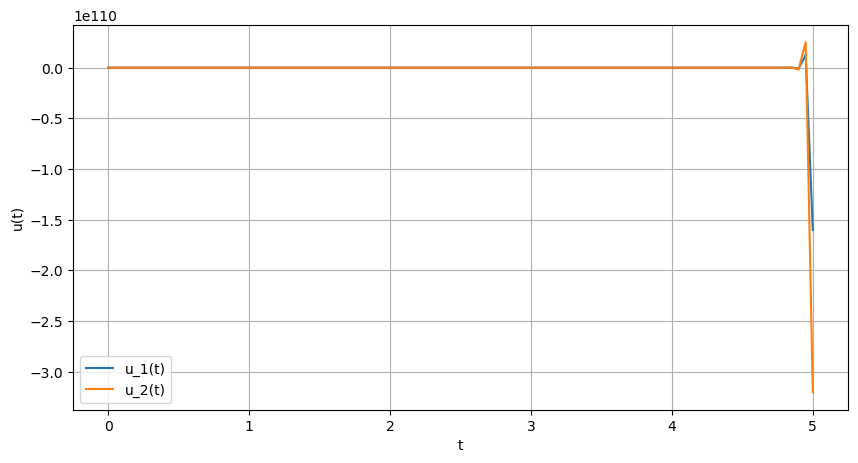

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(t, sol[:, 0], label='u_1(t)')
plt.plot(t, sol[:, 1], label='u_2(t)')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

### Интерполяционный метод Адамса третьего порядка